In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_train = pd.read_csv('emnist-balanced-train.csv')
data_test = pd.read_csv('emnist-balanced-test.csv')

In [3]:
data_train.rename(columns={'45':'label'}, inplace=True)
data_test.rename(columns={'41':'label'}, inplace=True)

In [4]:
X_train = data_train.drop('label',axis = 1)
y_train = data_train['label']

X_test = data_test.drop('label',axis = 1)
y_test = data_test['label']

In [5]:
label_map = pd.read_csv("mapping.txt", 
                        delimiter = ' ', 
                        index_col=0, 
                        header=None, 
                        squeeze=True)

In [6]:
label_dictionary = {}
for index, label in enumerate(label_map):
    label_dictionary[index] = chr(label)

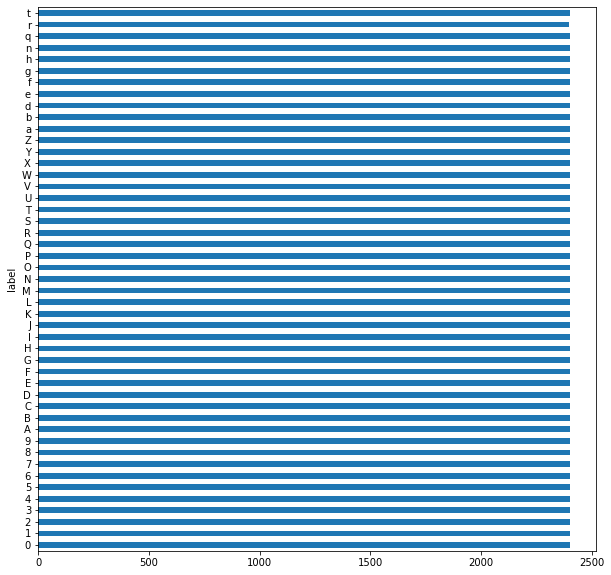

In [7]:
data_train['label'] = data_train['label'].map(label_dictionary)
label_size = data_train.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

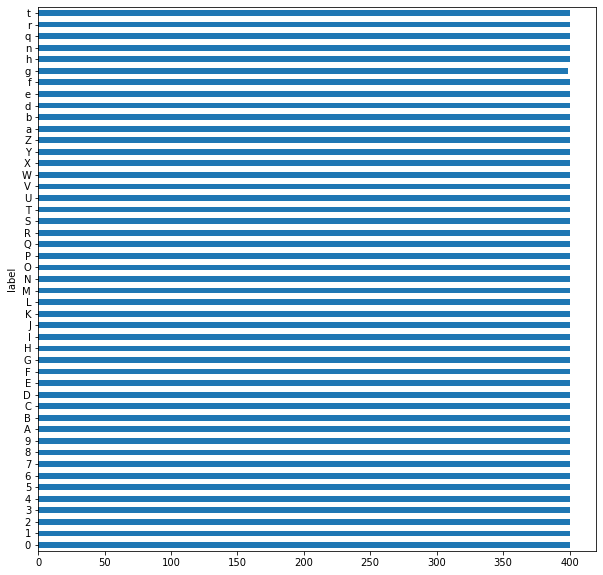

In [8]:
data_test['label'] = data_test['label'].map(label_dictionary)
label_size = data_test.groupby('label').size()
label_size.plot.barh(figsize=(10,10))

In [9]:
X_train = X_train.values
y_train = y_train.values
X_test = X_test.values
y_test = y_test.values

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [11]:
Y_train = np_utils.to_categorical([int(x) for x in y_train], 47)
Y_test = np_utils.to_categorical([int(x) for x in y_test], 47)

In [12]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X_train)
X_train = transformer.transform(X_train)

# y_train = Normalizer().fit(y_train)

transformer = Normalizer().fit(X_test)
X_test = transformer.transform(X_test)
# y_test = Normalizer().fit(y_test)

In [19]:
import time
from sklearn.naive_bayes import MultinomialNB
import pickle
for alpha in [0.001, 0.01, 0.1, 1, 10, 100]:
    start_time = time.time()
    text_clf = MultinomialNB(alpha = alpha)
    text_clf = text_clf.fit(X_train, y_train)


    train_time = time.time() - start_time
    print('Done training Naive Bayes in', train_time, 'seconds.')

    MODEL_PATH = 'model'
    import os
    if not os.path.exists(MODEL_PATH):
        os.makedirs(MODEL_PATH)
    # Save model
    pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "naive_bayes.pkl"), 'wb'))

    # import numpy as np
    # from sklearn.metrics import f1_score
    # Naive Bayes
    # model = pickle.load(open(os.path.join(MODEL_PATH,"naive_bayes.pkl"), 'rb'))
    y_pred = text_clf.predict(X_test)
    print(y_pred)
    print(y_test)
    print('Naive Bayes, Accuracy =', np.mean(y_pred == y_test))

#Naive Bayes, Accuracy = 0.5364115112505984, training: 22s

Done training Naive Bayes in 0.6779439449310303 seconds.
[ 0  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.535879568062131
Done training Naive Bayes in 0.6907501220703125 seconds.
[ 0  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.5357199851055907
Done training Naive Bayes in 0.6826272010803223 seconds.
[ 0  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.5357199851055907
Done training Naive Bayes in 0.6692781448364258 seconds.
[ 0  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.5344965157721155
Done training Naive Bayes in 0.6805551052093506 seconds.
[12  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.52869833501782
Done training Naive Bayes in 0.6894326210021973 seconds.
[ 0  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
Naive Bayes, Accuracy = 0.48736634927389755


In [16]:
import time
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import f1_score
import pickle
for C in [0.1, 10, 30, 50, 70, 100, 150, 200]:
    print('Training with C = ', C)
    start_time = time.time()
    text_clf = LogisticRegression(C = C)
    text_clf = text_clf.fit(X_train, y_train)


    train_time = time.time() - start_time
    print('Done training LR in', train_time, 'seconds.')

    MODEL_PATH = 'model'
    import os
    if not os.path.exists(MODEL_PATH):
        os.makedirs(MODEL_PATH)
    # Save model
    pickle.dump(text_clf, open(os.path.join(MODEL_PATH, "lr.pkl"), 'wb'))


    # Naive Bayes
    # model = pickle.load(open(os.path.join(MODEL_PATH,"lr.pkl"), 'rb'))
    y_pred = text_clf.predict(X_test)
    print(y_pred)
    print(y_test)
    print('LR, Accuracy =', np.mean(y_pred == y_test))



Training with C =  0.1
Done training LR in 147.77484512329102 seconds.
[39  9 26 ...  1 26 33]
[39  9 26 ...  1 26 33]
LR, Accuracy = 0.6358316931751689
Training with C =  10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Done training LR in 157.98992347717285 seconds.
[39  9 26 ... 21 26 33]
[39  9 26 ...  1 26 33]
LR, Accuracy = 0.6968987712112347
Training with C =  30


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Done training LR in 163.1918420791626 seconds.
[39  9 26 ... 21 26 33]
[39  9 26 ...  1 26 33]
LR, Accuracy = 0.6963136337039204
Training with C =  50


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Done training LR in 164.64696168899536 seconds.
[39  9 26 ... 21 26 33]
[39  9 26 ...  1 26 33]
LR, Accuracy = 0.6958348848342997
Training with C =  70


KeyboardInterrupt: ignored

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score
from sklearn.svm import SVC
max = 0
for c in [100, 500, 1000, 5000]:
    start_time = time.time()
    clf =  SVC(gamma='auto', C = c)
    text_clf = clf.fit(X_train, y_train)
    print('---------------------Loading C = ', str(C), '...---------------------------')

    train_time = time.time() - start_time
    print('Done training SVM in', train_time, 'seconds.')

    # SVM
    # model = pickle.load(open(os.path.join(MODEL_PATH,"svm.pkl"), 'rb'))
    y_pred = text_clf.predict(X_test)

    print('SVM, Accuracy =', np.mean(y_pred == y_test))

    print('SVM, Accuracy =', accuracy_score(y_pred, y_test))
    print('SVM, F1_Score =', f1_score(y_pred, y_test, average='macro'))
    if np.mean(y_pred == y_test) > max:
        max = np.mean(y_pred == y_test)
        model_max = text_clf
        print('findmax:', str(c))
    print('___________________________')

    MODEL_PATH = 'model'
    if not os.path.exists(MODEL_PATH):
        os.makedirs(MODEL_PATH)
    # Save model
    pickle.dump(model_max, open(os.path.join(MODEL_PATH,str(c) + "svmM.pkl"), 'wb'))


MODEL_PATH = 'model'
import os
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)
# Save model
pickle.dump(model_max, open(os.path.join(MODEL_PATH, "svmM.pkl"), 'wb'))


---------------------Loading C =  70 ...---------------------------
Done training SVM in 1561.3825628757477 seconds.
SVM, Accuracy = 0.7430182456513644
SVM, Accuracy = 0.7430182456513644
SVM, F1_Score = 0.7396133752350217
---------------------Loading C =  70 ...---------------------------
Done training SVM in 1069.25439786911 seconds.
SVM, Accuracy = 0.7641363902335231
SVM, Accuracy = 0.7641363902335231
SVM, F1_Score = 0.7616723991188202
---------------------Loading C =  70 ...---------------------------
Done training SVM in 969.605001449585 seconds.
SVM, Accuracy = 0.7660513857120059
SVM, Accuracy = 0.7660513857120059
SVM, F1_Score = 0.7639120988113997
---------------------Loading C =  70 ...---------------------------
Done training SVM in 877.560967206955 seconds.
SVM, Accuracy = 0.7645619447842971
SVM, Accuracy = 0.7645619447842971
SVM, F1_Score = 0.7626358469702197
